**For this run, we will try to use automation pmdarima**

**run5 use d=0, D=1, seasonal=True, m = 5**

In [1]:
#import all libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('seaborn-v0_8')
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib
import seaborn as sns
import sklearn
from scipy import stats

In [2]:
df = pd.read_csv('PCG.csv', index_col='StartDate',parse_dates=True)
df

,Year,Month,month week,WeekNum,PCG-BP,PCG-EMI,PCG-P09,PCG-P10,PCG-P15,PCG-P20,PCG-P25,PCG-P26,PCG-SS,PCG-SIN,PCG-SGS,PCG-EFB,PCG-P05
StartDate,,,,,,,,,,,,,,,,,
2013-12-30,2013,12,1,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,2014,1,4,2,2.0,0.0,6.0,1.0,46.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
2014-01-13,2014,1,4,3,2.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
2014-01-20,2014,1,4,4,2.0,0.0,6.0,1.0,46.0,9.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0
2014-01-27,2014,1,4,5,3.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,2023,12,4,49,0.0,0.0,0.0,0.0,82.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-11,2023,12,4,50,1.0,0.0,1.0,0.0,82.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-18,2023,12,4,51,0.0,0.0,0.0,0.0,82.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# DATA CLEANING
# drop unrelated column
# df = df.drop([0])

df = df.drop(df.columns[[0,1,2,3]], axis=1)
df = df.fillna(0) # fill na cells with 0

# remove first and last row due to their insignificant values
df.drop(df.head(1).index,inplace=True) # drop first row
df.drop(df.tail(1).index,inplace=True) # drop last row

# df = df.drop(df.row[[0,522]], axis=0)
df

,PCG-BP,PCG-EMI,PCG-P09,PCG-P10,PCG-P15,PCG-P20,PCG-P25,PCG-P26,PCG-SS,PCG-SIN,PCG-SGS,PCG-EFB,PCG-P05
StartDate,,,,,,,,,,,,,
2014-01-06,2.0,0.0,6.0,1.0,46.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
2014-01-13,2.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
2014-01-20,2.0,0.0,6.0,1.0,46.0,9.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0
2014-01-27,3.0,0.0,6.0,1.0,46.0,10.0,3.0,10.0,1.0,0.0,0.0,0.0,0.0
2014-02-03,0.0,0.0,2.0,0.0,22.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,2.0,0.0,1.0,0.0,12.0,6.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0
2023-12-04,0.0,0.0,0.0,0.0,82.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-11,1.0,0.0,1.0,0.0,82.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


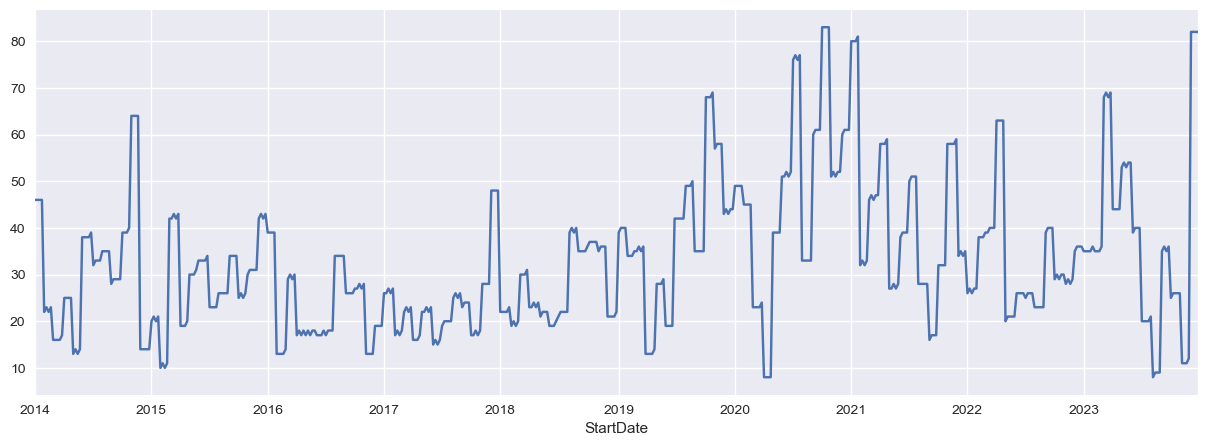

In [4]:
# plot the column PCG-P15 generaL view
# df["PCG-P15"].plot(figsize=(15, 5))

fig, ax1 = plt.subplots(figsize=(15,5))
df["PCG-P15"].plot(ax=ax1)
plt.show()

In [5]:
# removing outlier using Z-score method for PCG-P15 column
# z = np.abs(stats.zscore(df["PCG-P15"]))          # find absolute value of z-score for PCG-P15 columnn
z = np.abs(stats.zscore(df))          # find absolute value of z-score for PCG-P15 columnn
df_clean = df[(z<3).all(axis=1)]                             # only keep rows with z<|3|
df_clean.shape                                   # print shape

(438, 13)

In [6]:
df_clean

,PCG-BP,PCG-EMI,PCG-P09,PCG-P10,PCG-P15,PCG-P20,PCG-P25,PCG-P26,PCG-SS,PCG-SIN,PCG-SGS,PCG-EFB,PCG-P05
StartDate,,,,,,,,,,,,,
2014-01-06,2.0,0.0,6.0,1.0,46.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
2014-01-20,2.0,0.0,6.0,1.0,46.0,9.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0
2014-02-03,0.0,0.0,2.0,0.0,22.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
2014-02-10,0.0,0.0,2.0,0.0,23.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
2014-02-17,0.0,0.0,2.0,0.0,22.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,0.0,0.0,1.0,5.0,26.0,3.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0
2023-11-06,1.0,0.0,0.0,0.0,11.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2023-11-13,2.0,0.0,0.0,0.0,11.0,6.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0


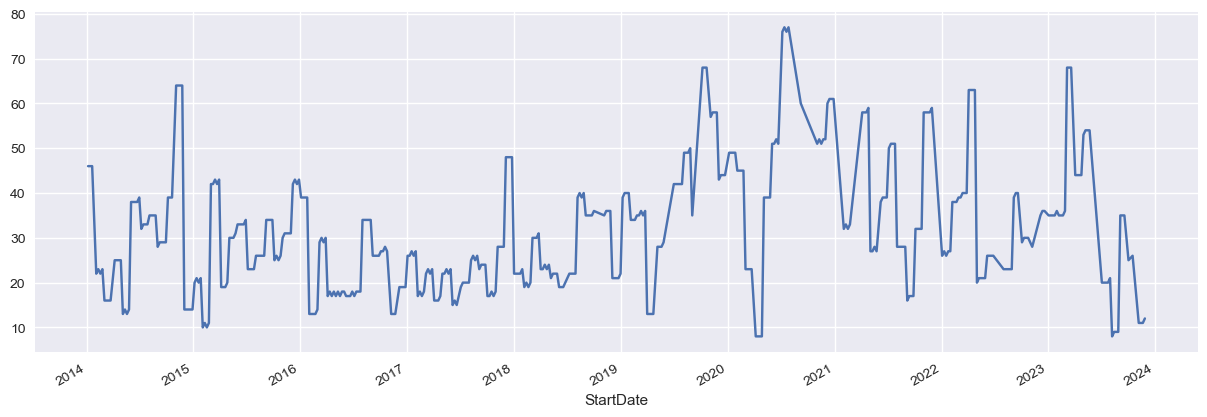

In [7]:
# plot the cleaned PCG-P15

fig, ax1 = plt.subplots(figsize=(15,5))
df_clean["PCG-P15"].plot(ax=ax1)
plt.show()

THE BOX-JENKINS METHOD
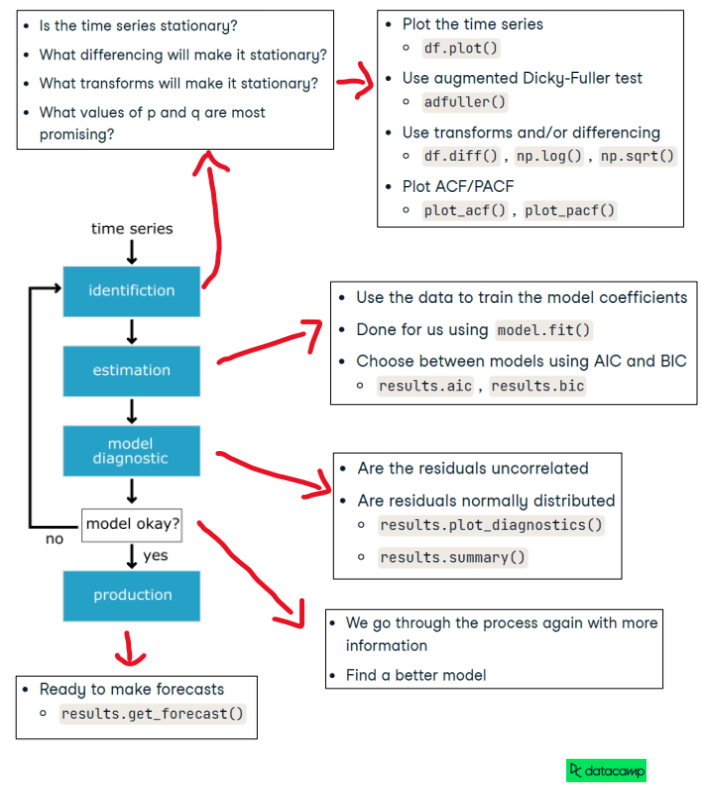

**STEP 1: IDENTIFICATION**

1.1) Test for stationarity

In [8]:
# assign the cleaned selected column PCG-P15 into new variable
P15 = df_clean["PCG-P15"]
P15

StartDate
2014-01-06    46.0
2014-01-20    46.0
2014-02-03    22.0
2014-02-10    23.0
2014-02-17    22.0
              ... 
2023-10-16    26.0
2023-11-06    11.0
2023-11-13    11.0
2023-11-20    11.0
2023-11-27    12.0
Name: PCG-P15, Length: 438, dtype: float64

In [9]:
# identify if the time-series is stationary by using augmented Dickey-Fuller test (ADFT)
# the null hypothesis is time-series is non-stationary
result_ADF = adfuller(P15)
print(result_ADF)
print('p-value is: ',result_ADF[1])

(-3.1787358143103077, 0.021249001862636688, 18, 419, {'1%': -3.4460536145702383, '5%': -2.868462751982839, '10%': -2.570457599182051}, 2901.681896453503)
p-value is:  0.021249001862636688


In [10]:
# since the p-value < 0.05, we have to reject the null hypothesis (reject non-stationary).
# Thus, our time-series is stationary and no further transformation or differencing is needed.

1.2) Finding values of p & q by plotting ACF/PACF

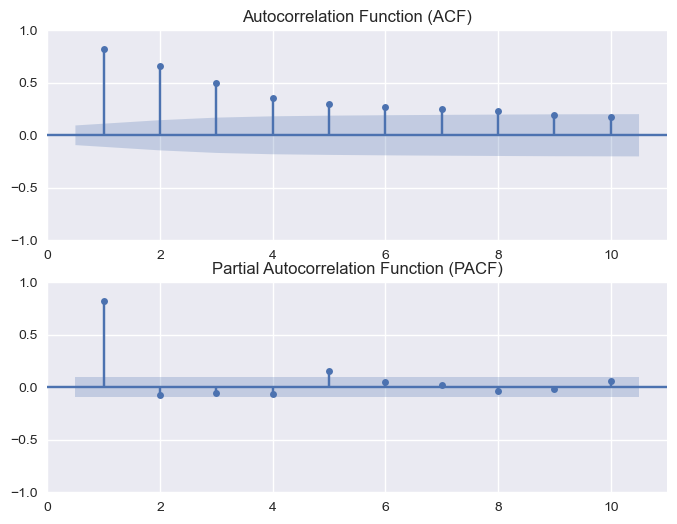

In [11]:
# import ACF/PACF library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6))
plot_acf(P15, lags=10, title='Autocorrelation Function (ACF)',zero=False, ax=ax1) # Make ACF plot
plot_pacf(P15, lags=10, title='Partial Autocorrelation Function (PACF)', zero=False, ax=ax2) # Make PACF plot
plt.show()

Choosing our model based on the following table:
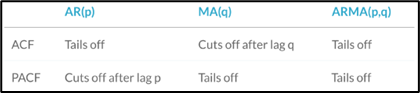

The ACF and the PACF are a little inconclusive. The ACF tails off nicely but the PACF might be undecisive. So it could be an ARMA(p,q) model or a AR(p) model. Hence, we will proceed with the next step, i.e. AIC & BIC to further clarify this model.

**STEP 2: ESTIMATION**

  2.1) Train the model coefficients using model.fit()

In [12]:
# use automation pmdarima to look for non-seasonal and seasonal time-series order

import pmdarima as pm
auto = pm.auto_arima(P15, d=0,
                     start_p=1,
                     start_q=1,
                     max_p=5,
                     max_q=5,
                     seasonal=True,
                     m=4,
                     D=2,
                     start_P=1,
                     start_Q=1,
                     max_P=5,
                     max_Q=5,
                     information_criterion='aic',
                     trace=True,
                     error_action='ignore',
                     stepwise=True)

print(auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,2,1)[4]             : AIC=inf, Time=1.27 sec
 ARIMA(0,0,0)(0,2,0)[4]             : AIC=4029.809, Time=0.03 sec
 ARIMA(1,0,0)(1,2,0)[4]             : AIC=3529.215, Time=0.17 sec
 ARIMA(0,0,1)(0,2,1)[4]             : AIC=inf, Time=0.43 sec
 ARIMA(1,0,0)(0,2,0)[4]             : AIC=3825.929, Time=0.06 sec
 ARIMA(1,0,0)(2,2,0)[4]             : AIC=3398.199, Time=0.25 sec
 ARIMA(1,0,0)(3,2,0)[4]             : AIC=3342.833, Time=0.69 sec
 ARIMA(1,0,0)(4,2,0)[4]             : AIC=3271.829, Time=1.02 sec
 ARIMA(1,0,0)(5,2,0)[4]             : AIC=3241.257, Time=1.70 sec
 ARIMA(1,0,0)(5,2,1)[4]             : AIC=inf, Time=4.98 sec
 ARIMA(1,0,0)(4,2,1)[4]             : AIC=inf, Time=2.95 sec
 ARIMA(0,0,0)(5,2,0)[4]             : AIC=3609.264, Time=0.69 sec
 ARIMA(2,0,0)(5,2,0)[4]             : AIC=3238.344, Time=2.26 sec
 ARIMA(2,0,0)(4,2,0)[4]             : AIC=3267.078, Time=0.89 sec
 ARIMA(2,0,0)(5,2,1)[4]             : AIC=inf, Time=6

**STEP 3: MODEL DIAGNOSTIC**

  3.1) Checking for the residual correlation

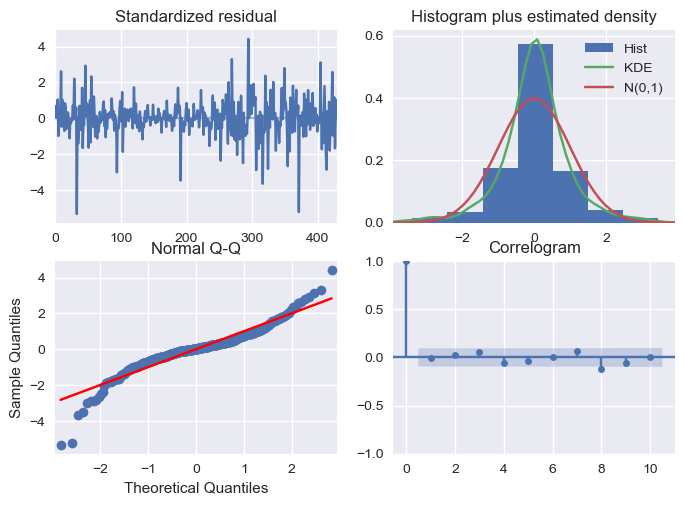

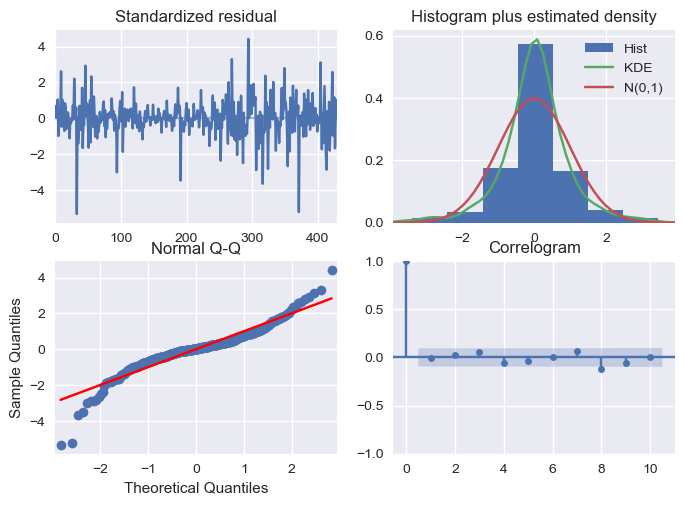

In [13]:
auto.plot_diagnostics()

**Reject current results**

Since Prob(Q): p-value for null hypothesis that residuals are uncorrelated is > 0.05, thus we have to accept the null hypothesis.

And since, Prob(JB) : p-value for null hypothesis that residuals are normal is < 0.05, thus we have to reject the null hypothesis. Hence, the residual is not normal.

From this diagnostics test, we have to re-run the process again with more information, or we might need to find a better model.

**Now we go for the seasonal decomposition of the time-series**

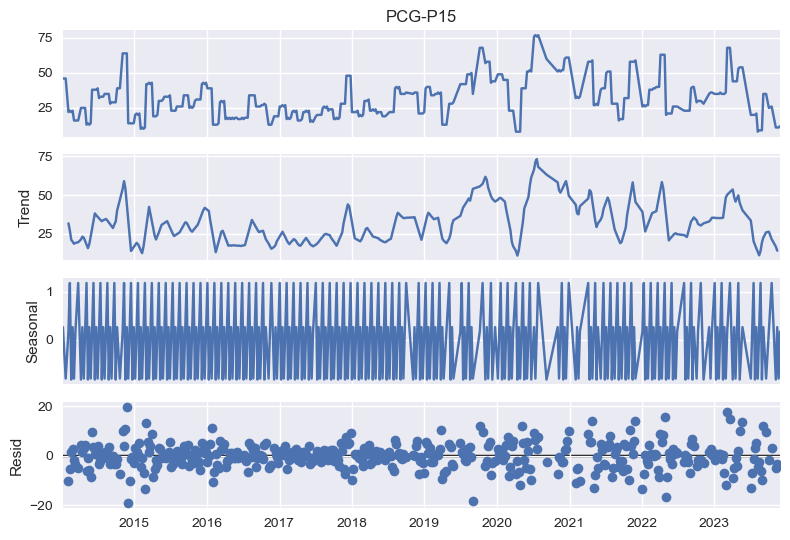

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_results = seasonal_decompose(P15, period = 5)

# Plot decomposed data
decomp_results.plot()
plt.show()

In [15]:
model = sm.tsa.arima.ARIMA(P15, order=(2,0,0), seasonal_order=(5,2,0,4))
fitted = model.fit()
print(fitted.summary())

C:\Users\PC10\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC10\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC10\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                    
Dep. Variable:                         PCG-P15   No. Observations:                  438
Model:             ARIMA(2, 0, 0)x(5, 2, 0, 4)   Log Likelihood               -1611.172
Date:                         Tue, 30 Jan 2024   AIC                           3238.344
Time:                                 10:22:30   BIC                           3270.855
Sample:                                      0   HQIC                          3251.182
                                         - 438                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8787      0.069     12.775      0.000       0.744       1.014
ar.L2         -0.1094      0.061     -1.780      0.075     

**Predicting Model**

In [16]:
#import statsmodels
#from statsmodels.tsa.arima.model import ARIMA
#import statsmodels.tsa.arima.model.ARIMAResults.get_prediction

# Create forecast object
forecast_object = fitted.get_prediction(steps = 12) #dynamic=True

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
# conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

In [2]:
#fig, ax1 = plt.subplots(figsize=(15,5))
#P15.plot(ax=ax1)
#plt.show()

#plt.figure(figsize=(15,5))

# Plot past CO2 levels
plt.plot(P15.index, P15, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
# plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [18]:
# Print last predicted mean
print(mean[-1])

# Print last confidence interval
print(conf_int.iloc[-1])
print(conf_int.iloc[-1])

8.375928753046352


NameError: name 'conf_int' is not defined

In [ ]:
# train & test data

